# Car Price Prediction

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy.stats import skew
from fitter import Fitter, get_common_distributions, get_distributions

## 1. Import “Cars prices” .csv file into your notebook and read it by Pandas python library.

In [2]:
main_df = pd.read_csv('CarPrice_Assignment.csv')
main_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 2. Drop rows with NaN entries.
* First, checking that there are NaN entries or not.

* After checking, we can see that **there is no amount of NaN values in CarPrice_Assignment.csv**.

In [3]:
main_df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

* Checking cp.csv file for nan entries

In [4]:
df_cp = pd.read_csv('cp.csv')
df_cp.dropna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## 4. Plot whole features with Pandas.DataFrame.plot function.

<AxesSubplot:>

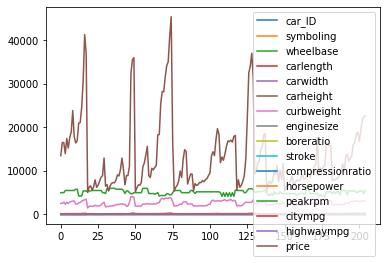

In [5]:
main_df.plot()

## 5. Distribution of data

* ### Distribution of target

C:\Users\fshak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

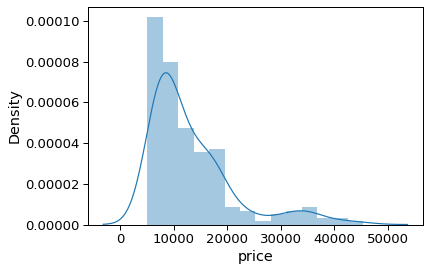

In [6]:
sns.set_context("paper", font_scale = 1.5)
target = main_df['price']
sns.distplot(target, hist=True)

* ### Removing the skewness of target

C:\Users\fshak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

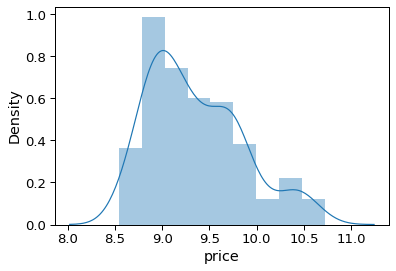

In [7]:
target_log = np.log(target)
sns.distplot(target_log, hist=True)

* ### Comparing the target(before skewness removing) and target_log(after skewness removing)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'Log price'}>]], dtype=object)

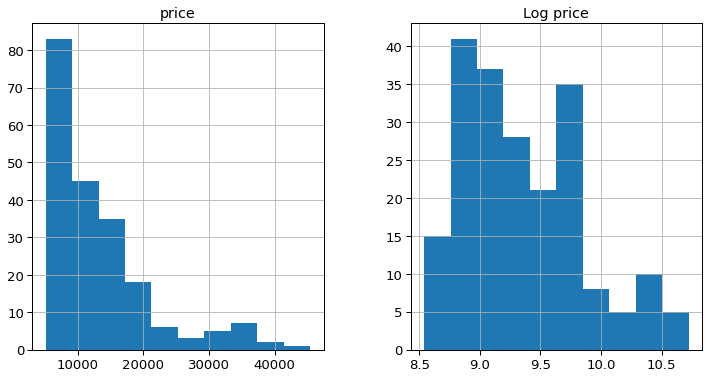

In [10]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({'price': main_df['price'], 'Log price': target_log})
prices.hist()

* ### Drop target column from main dataframe

In [11]:
df = main_df
main_df = main_df.drop(['price'], axis=1)
main_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


* ### Dividing data to numeric and categorical data:

In [12]:
# Save all categorical columns in a list
categorical_columns = [col for col in main_df.columns.values if main_df[col].dtype == 'object']

# dataframe with categorical featurs
df_cat = main_df[categorical_columns]

# dataframe with nomerical featurs
df_num = main_df.drop(categorical_columns, axis=1)

In [13]:
# descibe the numeric data
df_num.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [14]:
# describe the categorical data
df_cat.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


* ### Distribution of all numerical features

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>, <AxesSubplot:>]],
      dtype=object)

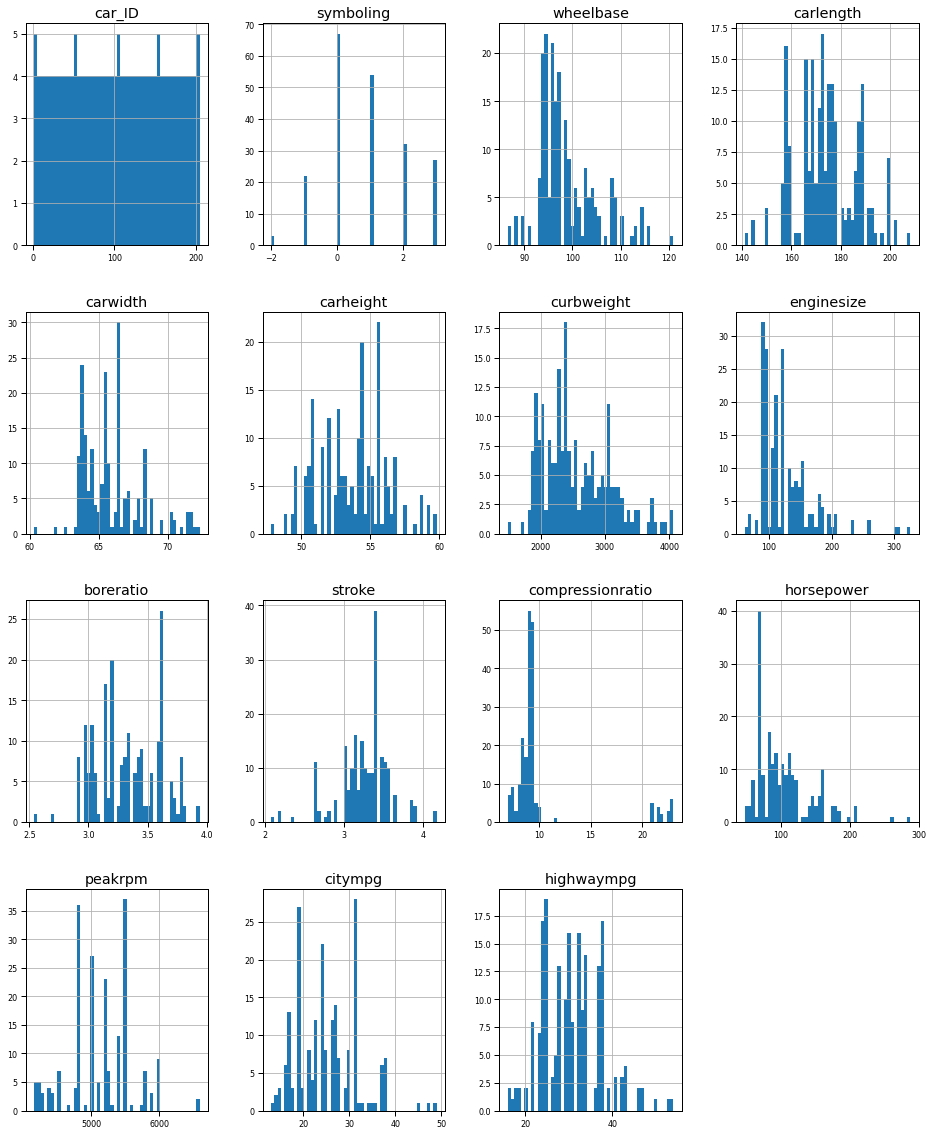

In [15]:
# We can check the skewness(cholegi) of data
# left skewd or right skewd and we can have data that is somewhat normally distributed
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

* ### Applying log + 1 transformation for all numeric features with skewness over .75

In [16]:
df_num_skew = df_num.apply(lambda x: skew(x.dropna()))
df_num_skew = df_num_skew[df_num_skew > .75]

df_num[df_num_skew.index] = np.log1p(df_num[df_num_skew.index])

In [17]:
# List of variables with skewness over .75
df_num_skew

wheelbase           1.042514
carwidth            0.897375
enginesize          1.933375
compressionratio    2.591720
horsepower          1.395006
dtype: float64

* ### Distribution of all numerical features after removing skewness

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>, <AxesSubplot:>]],
      dtype=object)

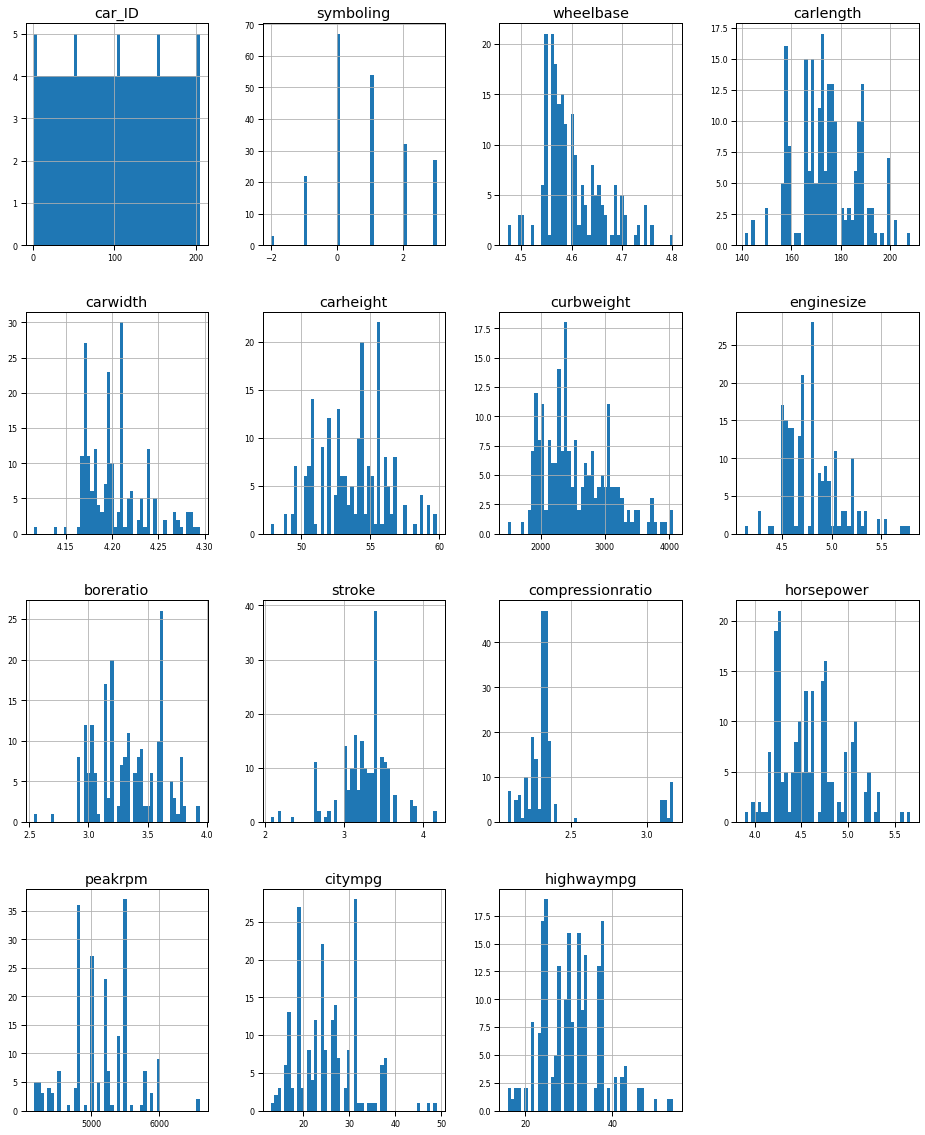

In [18]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

* ### Data normalization

In [19]:
df_num = ((df_num - df_num.min()) / (df_num.max() - df_num.min()))
df_num.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.388000,0.491780,0.486815,0.493740,0.414106,0.409874,0.564111,0.564483,0.263386,0.395704,0.398009,0.339431,0.388190
std,0.290797,0.249061,0.177901,0.184139,0.177020,0.203627,0.201971,0.168886,0.193460,0.149332,0.238465,0.192451,0.194688,0.181726,0.181222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.261320,0.376119,0.336416,0.350000,0.254849,0.275334,0.435714,0.495238,0.165956,0.208981,0.265306,0.166667,0.236842
50%,0.500000,0.600000,0.339527,0.479104,0.455430,0.525000,0.359193,0.402120,0.550000,0.580952,0.203114,0.378973,0.428571,0.305556,0.368421
75%,0.750000,0.800000,0.501858,0.626866,0.571964,0.641667,0.561288,0.498364,0.742857,0.638095,0.238814,0.490449,0.551020,0.472222,0.473684
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* ### Distribution of all numerical features after data normalization

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>, <AxesSubplot:>]],
      dtype=object)

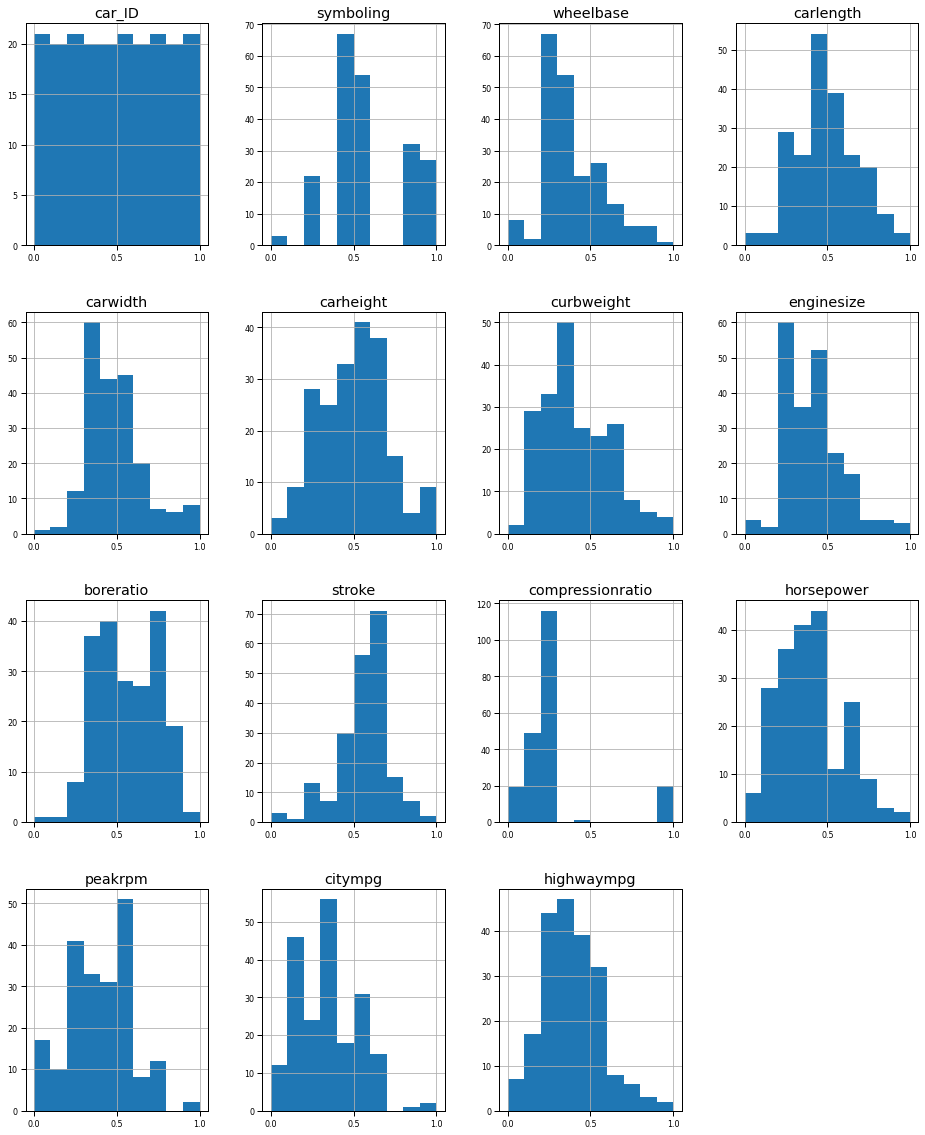

In [20]:
df_num.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

## 6. Sperate engine size and price features in a new Dataframe.

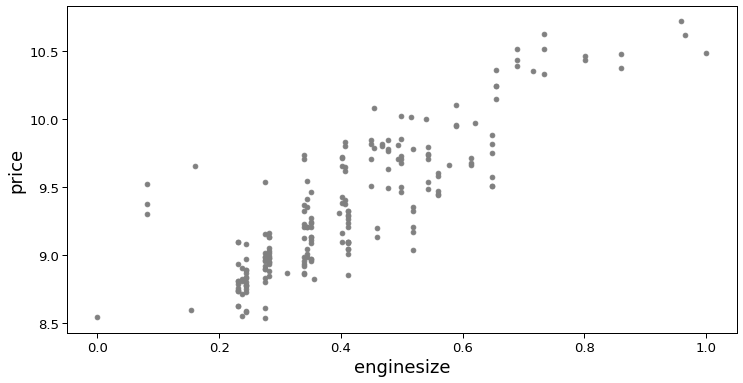

In [21]:
new_df = pd.DataFrame({'enginesize': df_num['enginesize'], 'price': target_log})

plt.scatter(new_df['enginesize'], new_df['price'], color = 'grey')
plt.xlabel('enginesize', fontsize=18)
plt.ylabel('price', fontsize=18)

plt.show()

## 7. Calculate linear regression between engine size and price features with Gradient descent method. ( Use SKlearn library )

In [22]:
# Split data
from sklearn.model_selection import train_test_split

X = new_df['enginesize'].values.reshape(-1, 1)
y = new_df['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=500000, tol=0.0001, eta0=0.0001, learning_rate='adaptive', n_iter_no_change=50000)

sgdr.fit(X_train, y_train.ravel())

## 8. After creating your model, test it with 20% of data.

In [148]:
y_pred = sgdr.predict(X_test)

## 9. Plot engine size and price features with regression line (Scatter plot).

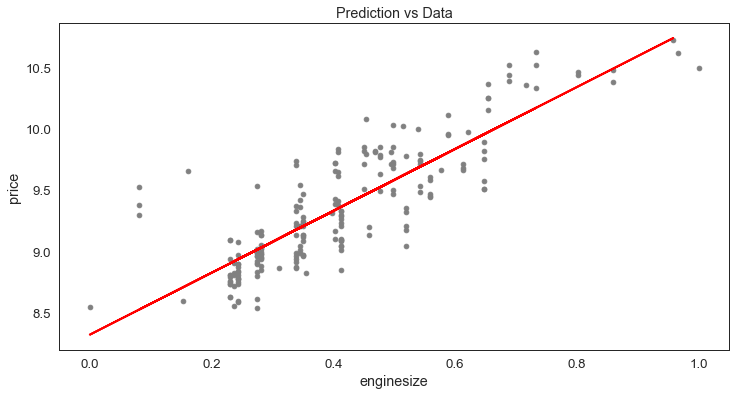

In [149]:
plt.scatter(X, y, color = "grey")
plt.plot(X_test, y_pred, color = "red", linewidth=2)

plt.title("Prediction vs Data")
plt.xlabel('enginesize')
plt.ylabel('price')

plt.show()

## 10. How much is this model accurate ( Use SKlearn library )? PDF

In [150]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2_score = sgdr.score(X_test,y_test)

print('RMSE: ', rmse)
print('R²:', r2_score)

RMSE:  0.2843583732401856
R²: 0.7167468581078008


* ### Comparing the original and predicted of test data

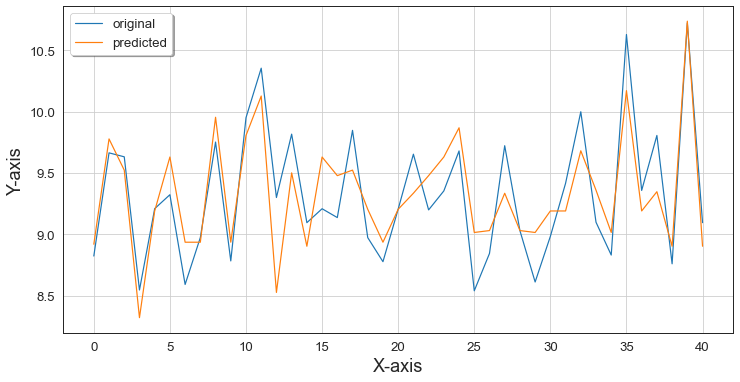

In [156]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.xlabel('X-axis', fontsize=18)
plt.ylabel('Y-axis', fontsize=18)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## 11. Write a sample function that get engine size and returns predicted price of car.

In [157]:
# 11
def myPredict(x):
    return sgdr.predict([[x]])
    
print(myPredict(200)[0])

512.6723390113008
